# Differential Evolution
<a href="https://colab.research.google.com/github/milocortes/mod_04_concentracion/blob/main/src/talleres_clase/differential_evolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 0
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 1
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 2
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 3
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 4
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 5
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 6
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
--------------------

-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 69
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 70
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 71
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 72
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 73
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 74
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-----------------------------
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
        Iteración 75
-%%%%%%%%%%%%%%%%%%%%%%%%%%%-
-----------------------------
-------------

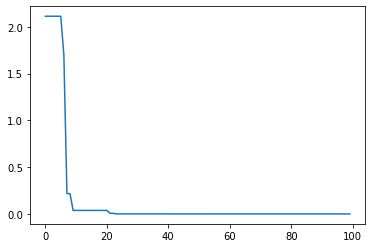

In [1]:
import numpy as np
import matplotlib.pyplot as plt

'''
------------------------------------------
                    DE
Classic Differential Evolution
-------------------------------------------
## Implemented as a minimization algorithm
# Inputs:
    * f_cost        - function to be minimized
    * pop_size      - number of individuals in the population
    * max_iters     - maximum number of optimization iterations
    * pc            - crossover probability
    * lb
    * ub
    * step_size
    * theta_0
# Output
    * best_theta    - best solution found
    * best_score    - history of best score
'''

def DE(f_cost,pop_size,max_iters,pc,lb,ub,step_size = 0.4, theta_0 = None):
    # problem dimension
    n_dim = np.shape(lb)[0]
    # randomly initialize the population
    pop_chrom = (ub - lb) * np.random.random_sample(size = (pop_size,n_dim)) + lb

    if theta_0 is not None:
        pop_chrom[0] = theta_0
    # obtain the cost of each solution
    pop_cost = np.zeros(pop_size)

    for id_p in range(pop_size):
        pop_cost[id_p] = f_cost(pop_chrom[id_p])

    # optimization
    for id_iter in range(max_iters):
        print("-----------------------------")
        print("-%%%%%%%%%%%%%%%%%%%%%%%%%%%-")
        print("        Iteración {}".format(id_iter))
        print("-%%%%%%%%%%%%%%%%%%%%%%%%%%%-")
        print("-----------------------------")

        for id_pop in range(pop_size):
            # pick candidate solution
            xi = pop_chrom[id_pop]
            # ids_cs vector containing the indexes of
            # the all other candidate solution but xi
            ids_cs = np.linspace(0, pop_size - 1, pop_size, dtype = int)
            # remove id_pop from ids_cs
            ids_cs = np.where(ids_cs != id_pop)
            # convert tuple to ndarray
            ids_cs = np.asarray(ids_cs)[0]
            # randomly pick 3 candidate solution using indexes ids_cs
            xa , xb , xc = pop_chrom[np.random.choice(ids_cs, 3, replace = False)]
            V1 = xa
            V2 = xb
            Vb = xc
            # create the difference vector
            Vd = V1 - V2
            # create the mutant vector
            Vm = Vb + step_size*Vd
            # make sure the mutant vector is in [lb,ub]
            Vm = np.clip(Vm,lb,ub)
            # create a trial vector by recombination
            Vt = np.zeros(n_dim)
            jr = np.random.rand()   # index of the dimension
                                    # that will under crossover
                                    # regardless of pc
            for id_dim in range(n_dim):
                rc = np.random.rand()
                if rc < pc or id_dim == jr:
                    # perform recombination
                    Vt[id_dim] = Vm[id_dim]
                else:
                    # copy from Vb
                    Vt[id_dim] = xi[id_dim]
            # obtain the cost of the trial vector
            vt_cost = f_cost(Vt)
            # select the id_pop individual for the next generation
            if vt_cost < pop_cost[id_pop]:
                pop_chrom[id_pop] = Vt
                pop_cost[id_pop] = vt_cost
        # store minimum cost and best solution
        ind_best = np.argmin(pop_cost)
        if id_iter == 0:
            minCost = [pop_cost[ind_best]]
            bestSol = [pop_chrom[ind_best]]
        else:
            minCost = np.vstack((minCost,pop_cost[ind_best]))
            bestSol = np.vstack((bestSol,pop_chrom[ind_best]))

    # return values
    ind_best_cost = np.argmin(minCost)
    best_theta = bestSol[ind_best_cost]
    best_score = minCost

    return best_score.flatten() ,best_theta.flatten()



# 1 - Define the upper and lower bounds of the search space
n_dim = 2               # Number of dimensions of the problem
ubc = 5
lbc = -5
lb = lbc*np.ones(n_dim)  # lower bound for the search space
ub = ubc*np.ones(n_dim)  # upper bound for the search space

# 2 - Define the parameters for the optimization
max_iters = 100  # maximum number of iterations

# 3 - Parameters for the algorithm
pc = 0.9 # crossover probability
pop_size = 60   # number of individuals in the population


# Función Himmelblau 
def himmelblau(X):
    x,y = X
    return (x**2 + y -11)**2 + (x + y**2 -7)**2

fitness, x_best = DE(himmelblau,pop_size,max_iters,pc,lb,ub,step_size = 0.8)

plt.plot(fitness)

In [2]:
x_best

array([3.00000002, 1.99999999])